# 1. Load and Preview the Data

In [2]:
import pandas as pd

# Load dataset
wine = pd.read_csv('data/winequality-red.csv')

# Display first few rows
print(wine.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

# 2. Data Types and Structure Check

In [3]:
# Check data types and summary info
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


# 3. Missing Values Analysis

In [4]:
# Check for null values
print(wine.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


# 4. Univariate Analysis

## For Numerical Features:

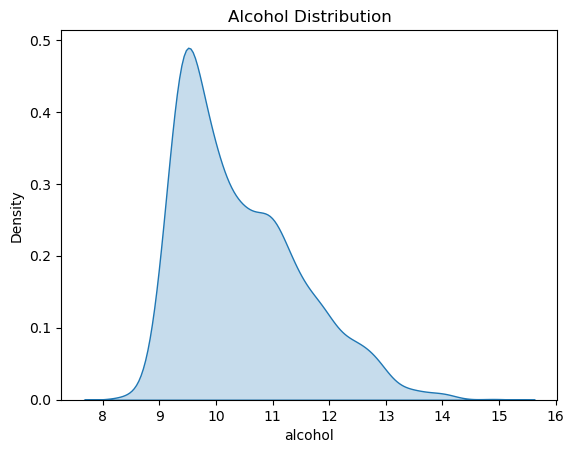

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# KDE plot for alcohol
sns.kdeplot(wine['alcohol'], fill=True)
plt.title('Alcohol Distribution')
plt.show()

## For Target Variable (Ordinal: quality):

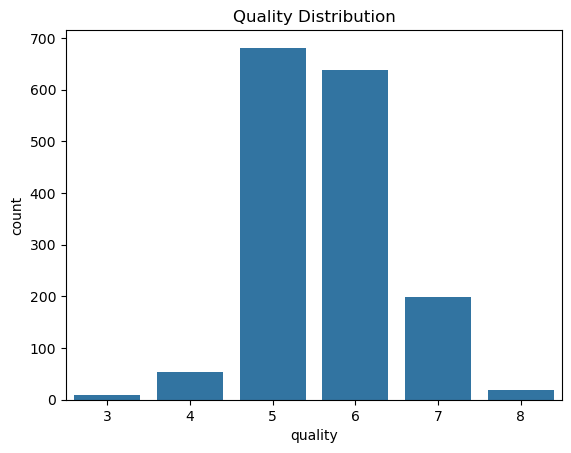

In [7]:
sns.countplot(x='quality', data=wine)
plt.title('Quality Distribution')
plt.show()

# 5. Outlier Detection

In [8]:
# QR for a Key Feature (volatile acidity)

Q1 = wine['volatile acidity'].quantile(0.25)
Q3 = wine['volatile acidity'].quantile(0.75)
IQR = Q3 - Q1
outliers = wine[(wine['volatile acidity'] < Q1 - 1.5 * IQR) | (wine['volatile acidity'] > Q3 + 1.5 * IQR)]
print(f"Number of volatile acidity outliers: {len(outliers)}")


Number of volatile acidity outliers: 19


## Boxplots for Distribution and Outliers

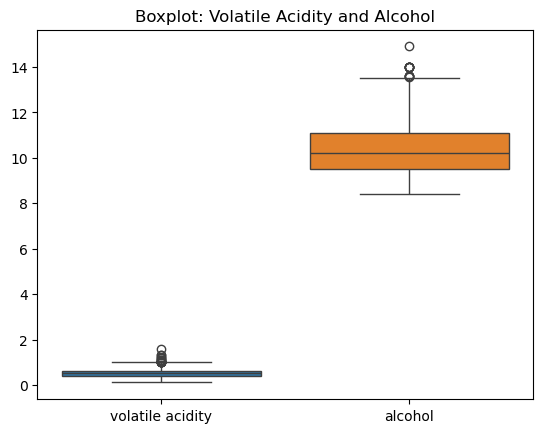

In [9]:
sns.boxplot(data=wine[['volatile acidity', 'alcohol']])
plt.title('Boxplot: Volatile Acidity and Alcohol')
plt.show()

# 7. Correlation Analysis

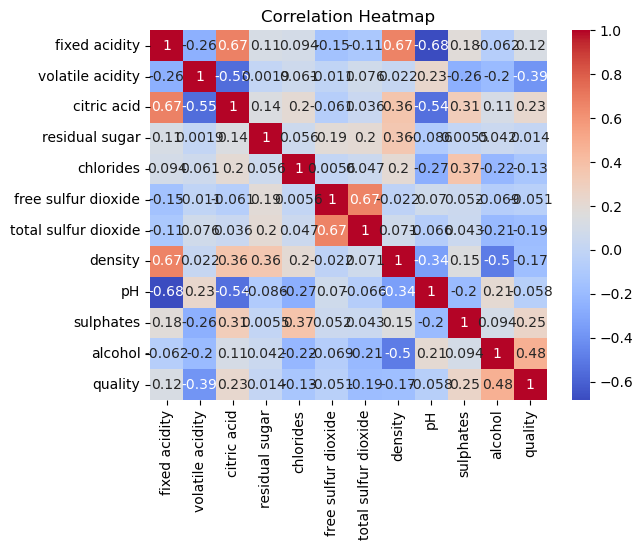

In [10]:
corr = wine.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 8. Bivariate and Multivariate Relationships

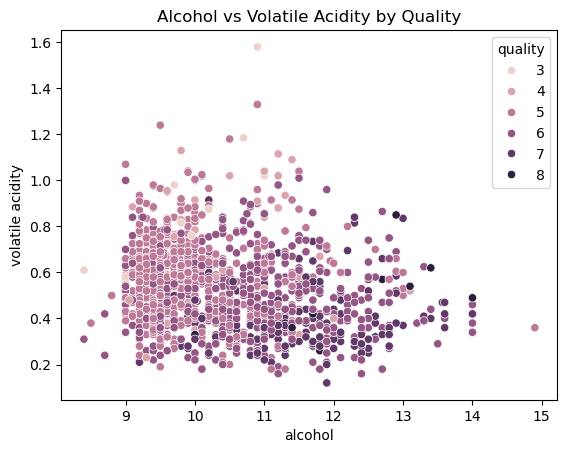

In [11]:
sns.scatterplot(x='alcohol', y='volatile acidity', hue='quality', data=wine)
plt.title('Alcohol vs Volatile Acidity by Quality')
plt.show()